# Project: Steel Industry Energy Consumption

The steel company produces various steel products and it captures and stores information concerning its enery consumption. The task at hand is to figure out how the company was consuming energy for the whole year.

## Goals
### Which times of the year is the most energy consumed?
### What patterns can we identify in energy usage?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the dataset 

steel_data = pd.read_csv('Steel_industry_data.csv')
#viewing data set
steel_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
# basic information about the data
steel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [14]:
# changing the column names to simpler names
col_names = {
    'Lagging_Current_Reactive.Energy_kVarh' : 'current_lagR',
    'Leading_Current_Reactive_Energy_kVarh' : 'current_leadR',
    'Lagging_Current_Energy_Factor' : 'current_lag_PF',
    'Leading_Current_Energy_Factor' : 'current_lead_PF',
    'CO2(tCO2)' : 'CO2'
}

steel_data=steel_data.rename(columns=col_names)

In [15]:
# changing date dtype to datetime64

steel_data['date'] = pd.to_datetime(steel_data.date)

In [16]:
steel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             35040 non-null  datetime64[ns]
 1   Usage_kWh        35040 non-null  float64       
 2   current_lagR     35040 non-null  float64       
 3   current_leadR    35040 non-null  float64       
 4   CO2              35040 non-null  float64       
 5   current_lag_PF   35040 non-null  float64       
 6   current_lead_PF  35040 non-null  float64       
 7   NSM              35040 non-null  int64         
 8   WeekStatus       35040 non-null  object        
 9   Day_of_week      35040 non-null  object        
 10  Load_Type        35040 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 2.9+ MB


In [94]:
# getting the time and month from the date

steel_data['month'] = steel_data.date.dt.month_name()
steel_data['time'] = steel_data.date.dt.time
steel_data['Day_of_week'] = steel_data.Day_of_week.str[:3]
steel_data['month'] = steel_data.month.str[:3]
steel_data['month_int']= steel_data.date.dt.month

In [95]:
# number of time stamps recorded per given day

len(steel_data['time'].value_counts())

96

## Which day of the week had the highest average Energy usage overally?

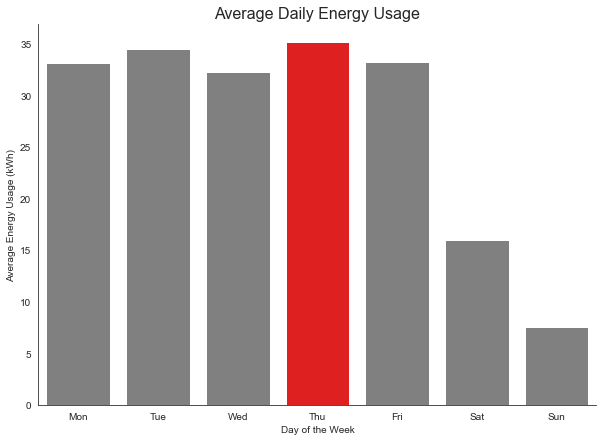

In [183]:
sns.set_style('white')
pallete_dict = {'Mon': 'grey', 'Tue':'grey', 'Wed':'grey', 'Thu':'red', 'Fri':'grey', 'Sat':'grey',
            'Sun': 'grey'}
g=sns.barplot(x='Day_of_week', y='Usage_kWh', data=steel_data, palette=pallete_dict, ci=None)
g.set_title('Average Daily Energy Usage', fontsize=16, fontweight=12)
g.set_xlabel('Day of the Week')
g.set_ylabel('Average Energy Usage (kWh)')
sns.despine()
plt.show()

### higest by load

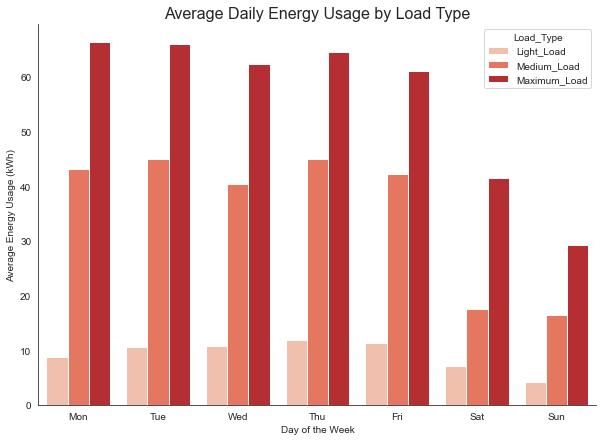

In [184]:
g=sns.barplot(x='Day_of_week', y='Usage_kWh', data=steel_data,hue='Load_Type', palette='Reds', ci=None)
g.set_title('Average Daily Energy Usage by Load Type', fontsize=16, fontweight=12)
g.set_xlabel('Day of the Week')
g.set_ylabel('Average Energy Usage (kWh)')
sns.despine()
plt.show()

## Energy usage monthly trend.

In [185]:
monthly_usage = steel_data.groupby(['month','month_int']).agg({'Usage_kWh':'mean'}).sort_values('month_int').reset_index()

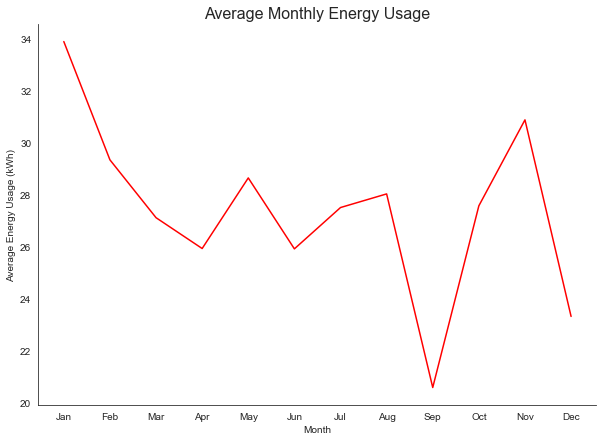

In [186]:
g=sns.lineplot(y='Usage_kWh', x='month', data=monthly_usage, color=red,)
g.set_title('Average Monthly Energy Usage', fontsize=16, fontweight=12)
g.set_xlabel('Month')
g.set_ylabel('Average Energy Usage (kWh)')
sns.despine()
plt.show()

## which quarter had the most Energy usage?

In [187]:
# creating a quarter field
steel_data['quarter'] = steel_data.date.dt.quarter


In [188]:
# aggregating Energy usage by quarter
quarter_usage = steel_data.groupby('quarter').agg({'Usage_kWh':'sum'}).reset_index()

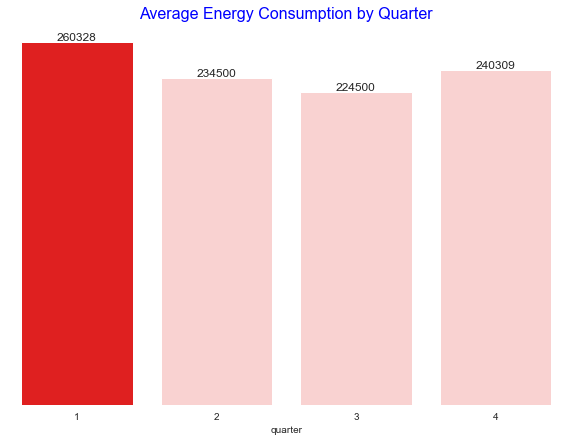

In [189]:
palette_dict= {1:'red', 2:'#ffcccb', 3:'#ffcccb', 4:'#ffcccb'}
g=sns.barplot(x='quarter', y='Usage_kWh', data=quarter_usage, palette=palette_dict)
g.set_title('Average Energy Consumption by Quarter', fontsize=16, color='blue')
g.set(ylabel=None)
plt.yticks([])
sns.despine(left=True, bottom=True)
for container in g.containers:
    plt.bar_label(container, fontsize=12)
plt.show()


## For the different days of the week how does the energy usage vary during the different times of the day?

In [190]:
# hours after midnight column
steel_data['hAM'] = [x/3600 for x in steel_data.NSM]

In [191]:
timely_usage=steel_data.groupby(['Day_of_week','hAM']).agg({'Usage_kWh':'mean'}).reset_index()


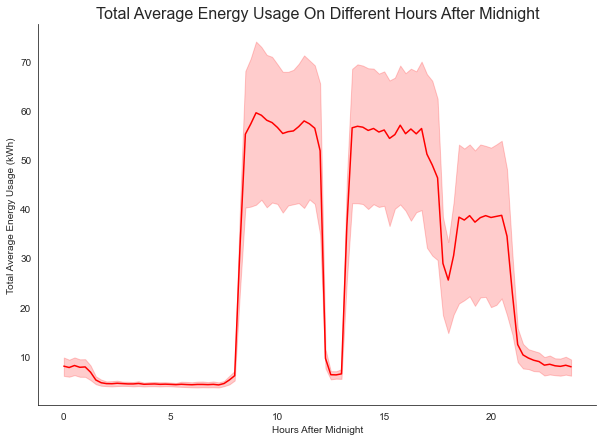

In [192]:
plt.rcParams['figure.figsize'] = (10,7)
g=sns.lineplot(x='hAM', y='Usage_kWh', data=timely_usage, color='red')
g.set_title('Total Average Energy Usage On Different Hours After Midnight', fontsize=16)
g.set_xlabel('Hours After Midnight')
g.set_ylabel('Total Average Energy Usage (kWh)')
sns.despine()


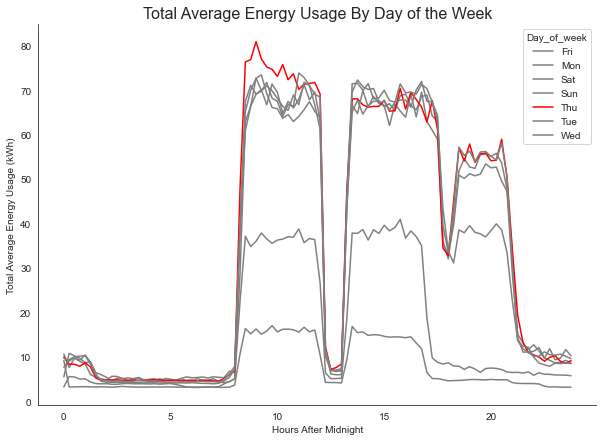

In [193]:
plt.rcParams['figure.figsize'] = (10,7)
palette_dict = {'Mon': 'grey', 'Tue':'grey', 'Wed':'grey', 'Thu':'red', 'Fri':'grey', 'Sat':'grey',
            'Sun': 'grey'}
g=sns.lineplot(x='hAM', y='Usage_kWh', data=timely_usage, hue='Day_of_week', palette=palette_dict)
g.set_title('Total Average Energy Usage By Day of the Week', fontsize=16)
g.set_xlabel('Hours After Midnight')
g.set_ylabel('Total Average Energy Usage (kWh)')
sns.despine()


## What was the yearly total Energy usage for the various load types

In [194]:
load_usage=steel_data.groupby('Load_Type').agg({'Usage_kWh':'sum'}).reset_index()
load_usage['per_usage'] = [x*100/sum(load_usage['Usage_kWh']) for x in load_usage['Usage_kWh'] ]
load_usage

,Load_Type,Usage_kWh,per_usage
0,Light_Load,155892.81,16.244982
1,Maximum_Load,430977.36,44.910470
2,Medium_Load,372766.54,38.844548


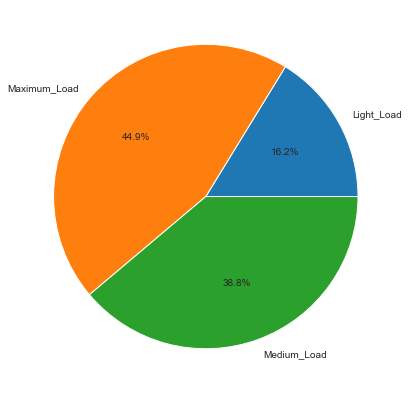

In [195]:
labels=load_usage.Load_Type
sizes = load_usage.per_usage
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes,labels=labels,shadow=False,autopct='%1.1f%%', )
plt.show()

## Total Carbon Dioxide Emission ?

In [196]:
steel_data.CO2.sum()

403.81

## Total CO2 emissions 403.81t

# Conclusion

The steel company consumed the highest amounts of energy during the first quarter quarter of the year, with the month of January being the highest energy consuming month. The 4th quarter has the second highest consumption with November also being the month with the second leading energy consumption. The month of September recorder the least amount of energy consumption. 

Moreover, Thursday is the day that had the highest energy consumption followed by Tuesday. However, further analysis showed that Tuesday had the highest maximum load consumption. Trendwise, there was a decline in average energy consumption from February to around september and then the energy consumption went back up again in the month of October. The energy consumption is low for about 10 hrs after midnight and then it picks to a maximum for about 5 hours and going down again only to pick again an hour later for an additional 5 hours. The energy consumption falls a bit 18hrs after midnight and it maintains for about 4 hours then it goes back to the lowest consumption as midnight approaches. 

Loadwise, maximum load had the highest contribution in the energy consumption with a 44.9% overall contribution.